In [1]:
import numpy as np

csv_path = "./mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)


In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


### [Problem 1] Data visualization

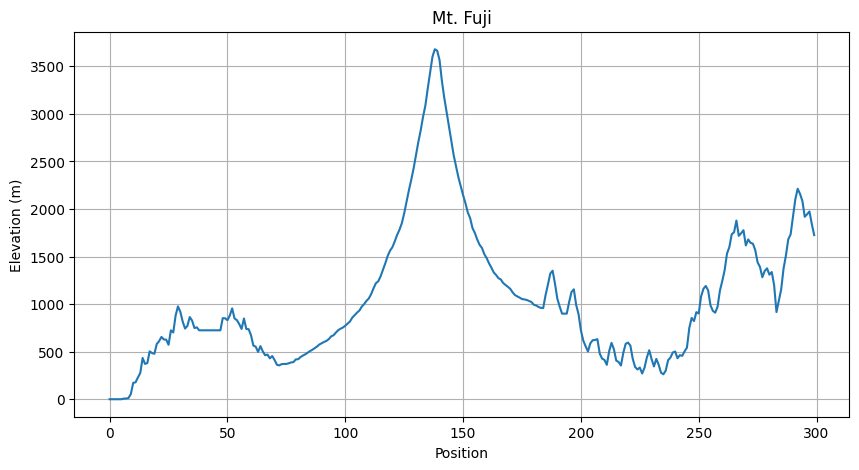

In [3]:
import matplotlib.pyplot as plt

# Extract the point number and elevation
points = fuji[:, 0]
elevation = fuji[:, 3]

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(points, elevation)
plt.title("Mt. Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation (m)")
plt.grid(True)
plt.show()

### [Problem 2] Create a function to calculate the gradient at a certain point

In [4]:
import numpy as np

# Function to calculate the gradient at a given point
def calculate_gradient(elevation_data, current_index):
    if current_index == 0:
        return None  # Cannot calculate gradient for the first point
    y_current = elevation_data[current_index]
    y_previous = elevation_data[current_index - 1]
    x_current = current_index
    x_previous = current_index - 1
    gradient = (y_current - y_previous) / (x_current - x_previous)
    return gradient



# Calculate gradient at a specific point (e.g., point 10)
current_point_index = 10
grad = calculate_gradient(elevation, current_point_index)
print(f"Gradient at point {current_point_index}: {grad}")


Gradient at point 10: 117.15


### [Problem 3] Create a function to calculate the destination point

In [5]:
# Function to calculate the next point to move to based on the current slope
def calculate_next_point(elevation_data, current_index, alpha):
    gradient = calculate_gradient(elevation_data, current_index)
    if gradient is None:
        return current_index  # If gradient is None, stay at the current point
    next_point = current_index - alpha * gradient
    next_point = int(round(next_point))
    if next_point < 0:
        next_point = 0  # If the next point is negative, set it to 0
    elif next_point >= len(elevation_data):
        next_point = len(elevation_data) - 1  # If the next point is out of bounds, set it to the last point
    return next_point


# Parameters
alpha = 0.2
current_point_index = 8

# Calculate the next point
next_point_index = calculate_next_point(elevation, current_point_index, alpha)
print(f"Current point: {current_point_index}, Next point: {next_point_index}")


Current point: 8, Next point: 7


### [Problem 4] Create a function to go down the mountain

In [6]:
# Function to simulate going down the mountain
def go_down_mountain(elevation_data, start_point, alpha):
    current_point = start_point
    descent_path = [current_point]

    while True:
        next_point = calculate_next_point(elevation_data, current_point, alpha)
        if next_point == current_point:
            break  # Stop if the next point is the same as the current point
        descent_path.append(next_point)
        current_point = next_point

    return descent_path

# Parameters
alpha = 0.2
start_point_index = 136  # Starting near the summit of Mt. Fuji

# Simulate going down the mountain
descent_path = go_down_mountain(elevation, start_point_index, alpha)
print(f"Descent path: {descent_path}")

Descent path: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


### [Problem 5] Visualization of the descent process

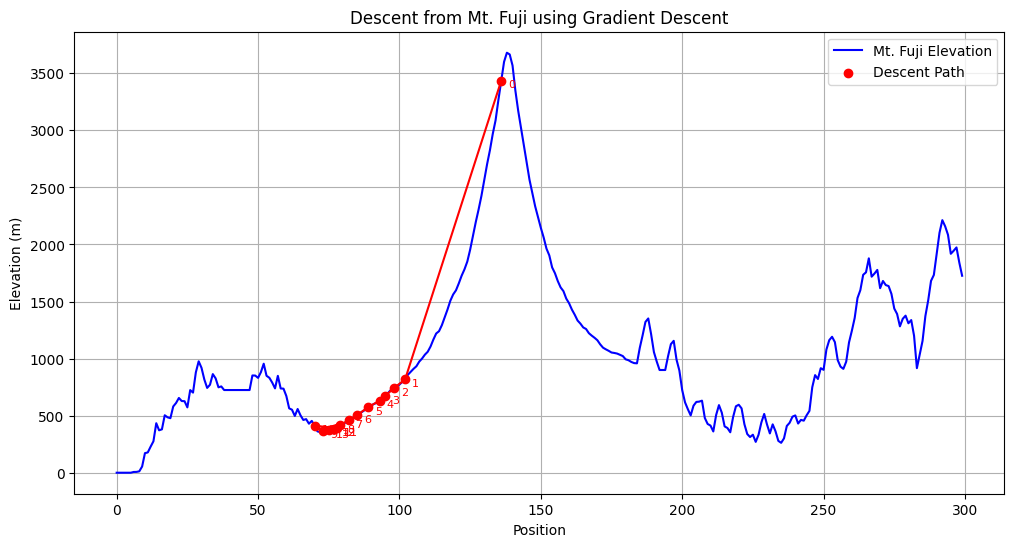

In [7]:
# Plotting the descent process for visualization

# Extract the point number and elevation
points = fuji[:, 0]

# Convert path to coordinates
path_points = [fuji[i, 0] for i in descent_path]
path_elevation = [fuji[i, 3] for i in descent_path]

# Plot the descent path
plt.figure(figsize=(12, 6))
plt.plot(points, elevation, label='Mt. Fuji Elevation', color='blue')
plt.scatter(path_points, path_elevation, color='red', zorder=5, label='Descent Path')
plt.plot(path_points, path_elevation, linestyle='-', color='red', zorder=5)

# Annotate each point on the descent path
for i, (x, y) in enumerate(zip(path_points, path_elevation)):
    plt.annotate(f'{i}', xy=(x, y), xytext=(5, -5), textcoords='offset points', color='red', fontsize=8)

plt.title("Descent from Mt. Fuji using Gradient Descent")
plt.xlabel("Position")
plt.ylabel("Elevation (m)")
plt.legend()
plt.grid(True)
plt.show()


### [Problem 6] Change of initial value

In [8]:
# Function to calculate the gradient at a given point
def calculate_gradient(elevation_data, current_index):
    if current_index == 0:
        return None  # Cannot calculate gradient for the first point
    y_current = elevation_data[current_index]
    y_previous = elevation_data[current_index - 1]
    x_current = current_index
    x_previous = current_index - 1
    gradient = (y_current - y_previous) / (x_current - x_previous)
    return gradient

Descent path from starting point 0: [0]


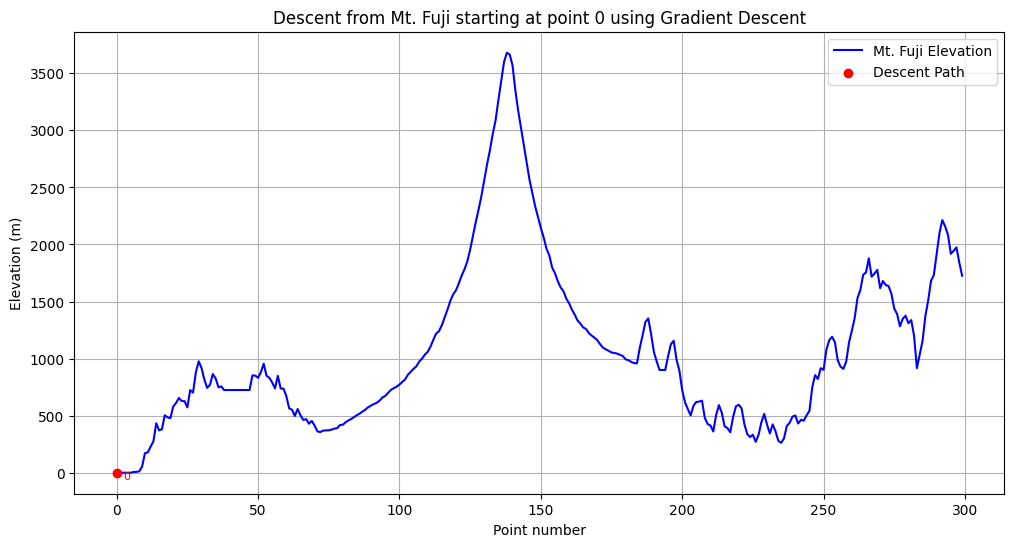

Descent path from starting point 50: [50, 54, 58, 80]


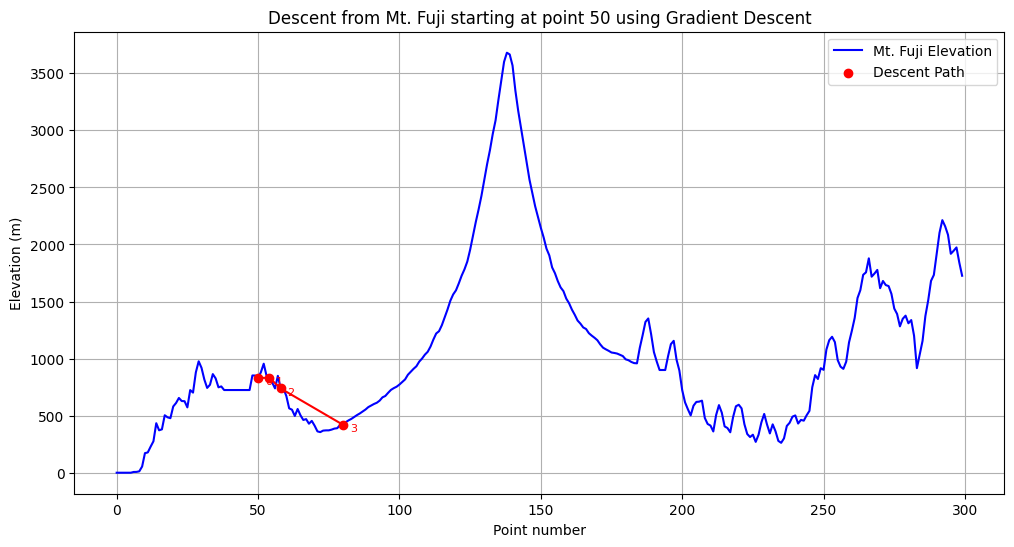

Descent path from starting point 100: [100, 96, 90, 87, 84, 81, 77, 75]


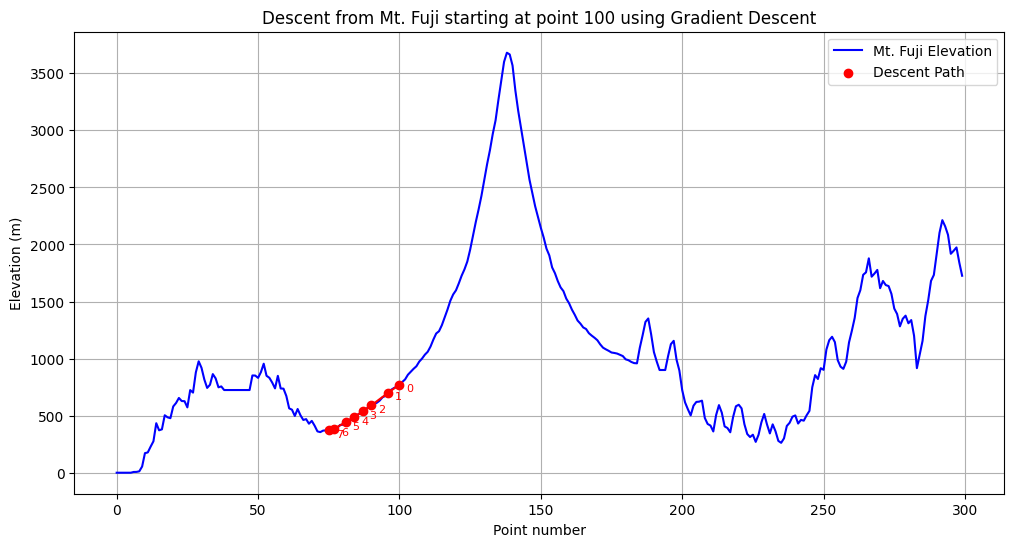

Descent path from starting point 136: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


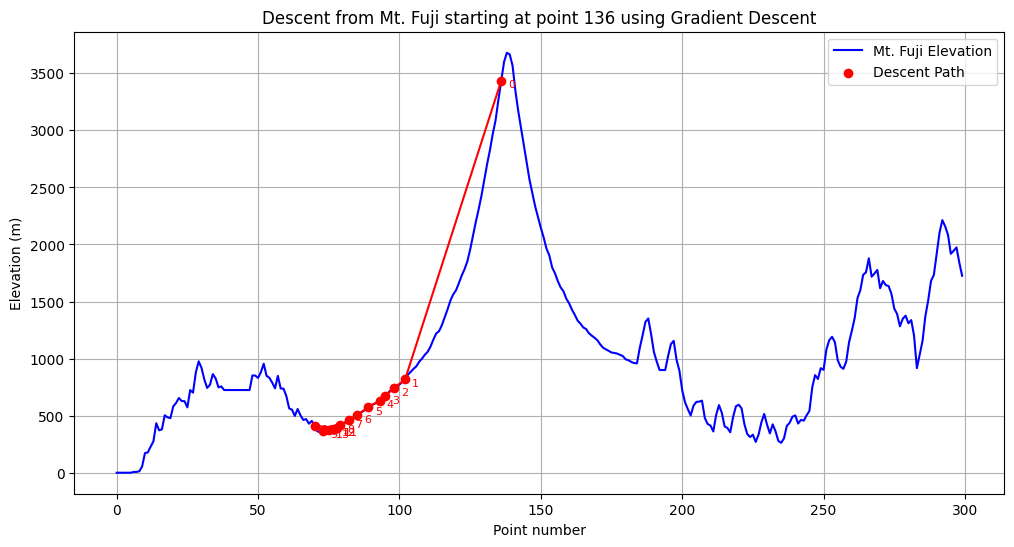

In [9]:
# Function to visualize the descent process from any starting point
def visualize_descent(elevation_data, start_point, alpha):
    descent_path = go_down_mountain(elevation_data, start_point, alpha)
    print(f"Descent path from starting point {start_point}: {descent_path}")

    # Extract the point number and elevation
    points = np.arange(len(elevation_data))
    elevation = elevation_data

    # Convert path to coordinates
    path_points = [points[i] for i in descent_path]
    path_elevation = [elevation[i] for i in descent_path]

    # Plot the descent path
    plt.figure(figsize=(12, 6))
    plt.plot(points, elevation, label='Mt. Fuji Elevation', color='blue')
    plt.scatter(path_points, path_elevation, color='red', zorder=5, label='Descent Path')
    plt.plot(path_points, path_elevation, linestyle='-', color='red', zorder=5)

    # Annotate each point on the descent path
    for i, (x, y) in enumerate(zip(path_points, path_elevation)):
        plt.annotate(f'{i}', xy=(x, y), xytext=(5, -5), textcoords='offset points', color='red', fontsize=8)

    # Adding titles and labels
    plt.title(f"Descent from Mt. Fuji starting at point {start_point} using Gradient Descent")
    plt.xlabel("Point number")
    plt.ylabel("Elevation (m)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Extract the elevation data
elevation = fuji[:, 3]

# Parameters
alpha = 0.2
start_point_indices = range(len(elevation))  # All possible starting points

# # Simulate and visualize descent from each starting point
# for start_point_index in start_point_indices:
#     visualize_descent(elevation, start_point_index, alpha)

selected_start_points = [0, 50, 100, 136]

# Simulate and visualize descent from selected starting points
for start_point_index in selected_start_points:
    visualize_descent(elevation, start_point_index, alpha)

### [Problem 7] Visualization of the descent process for each initial value

Descent path from starting point 0: [0]
Descent path from starting point 50: [50, 54, 58, 80]
Descent path from starting point 100: [100, 96, 90, 87, 84, 81, 77, 75]
Descent path from starting point 136: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


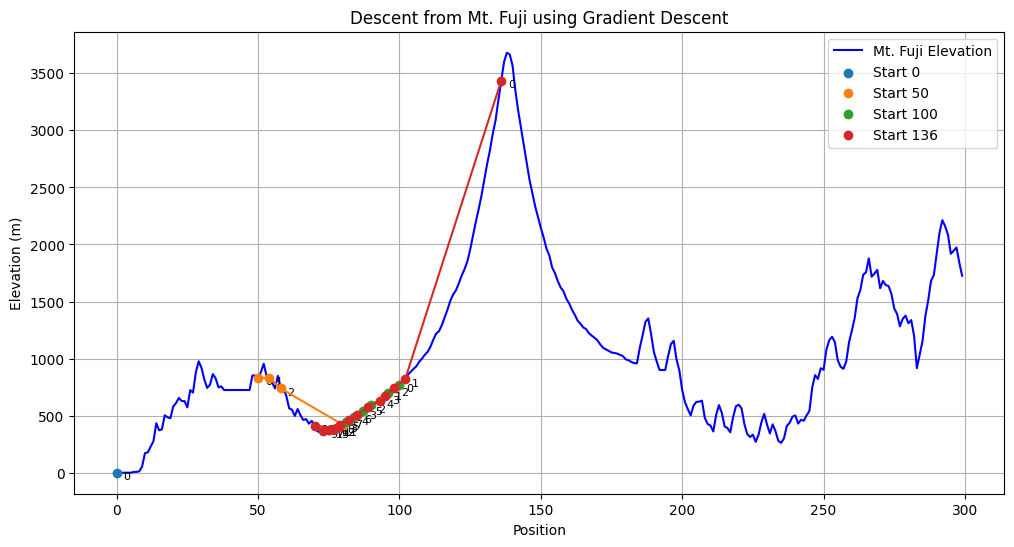

In [10]:
# Function to visualize the descent process for multiple starting points
def visualize_multiple_descents(elevation_data, start_points, alpha):
    points = np.arange(len(elevation_data))
    elevation = elevation_data

    plt.figure(figsize=(12, 6))
    plt.plot(points, elevation, label='Mt. Fuji Elevation', color='blue')

    for start_point in start_points:
        descent_path = go_down_mountain(elevation_data, start_point, alpha)
        print(f"Descent path from starting point {start_point}: {descent_path}")

        # Convert path to coordinates
        path_points = [points[i] for i in descent_path]
        path_elevation = [elevation[i] for i in descent_path]

        # Plot the descent path
        plt.scatter(path_points, path_elevation, label=f'Start {start_point}', zorder=5)
        plt.plot(path_points, path_elevation, linestyle='-', zorder=5)

        # Annotate each point on the descent path
        for i, (x, y) in enumerate(zip(path_points, path_elevation)):
            plt.annotate(f'{i}', xy=(x, y), xytext=(5, -5), textcoords='offset points', fontsize=8)

    # Adding titles and labels
    plt.title(f"Descent from Mt. Fuji using Gradient Descent")
    plt.xlabel("Position")
    plt.ylabel("Elevation (m)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Select a few specific starting points
selected_start_points = [0, 50, 100, 136]

# Visualize descent for selected starting points
visualize_multiple_descents(elevation, selected_start_points, alpha)

### [Problem 8] (Advance problem) Hyperparameter changes

Descent path from starting point 0 with alpha 0.1: [0]
Descent path from starting point 50 with alpha 0.1: [50, 52, 45]
Descent path from starting point 100 with alpha 0.1: [100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]
Descent path from starting point 136 with alpha 0.1: [136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]
Descent path from starting point 0 with alpha 0.2: [0]
Descent path from starting point 50 with alpha 0.2: [50, 54, 58, 80]
Descent path from starting point 100 with alpha 0.2: [100, 96, 90, 87, 84, 81, 77, 75]
Descent path from starting point 136 with alpha 0.2: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
Descent path from starting point 0 with alpha 0.5: [0]
Descent path from starting point 50 with alpha 0.5: [50, 60, 92, 87, 78, 76, 73, 66, 86, 79, 65, 93, 84, 76, 73, 66, 86, 79, 65, 93, 84, 76, 73, 66, 86, 79, 65, 93, 84, 76, 73, 66, 86, 79, 65, 93, 84, 76, 73, 66, 86, 79, 65, 93, 84, 76, 73, 66, 86, 79, 65, 93, 84, 7

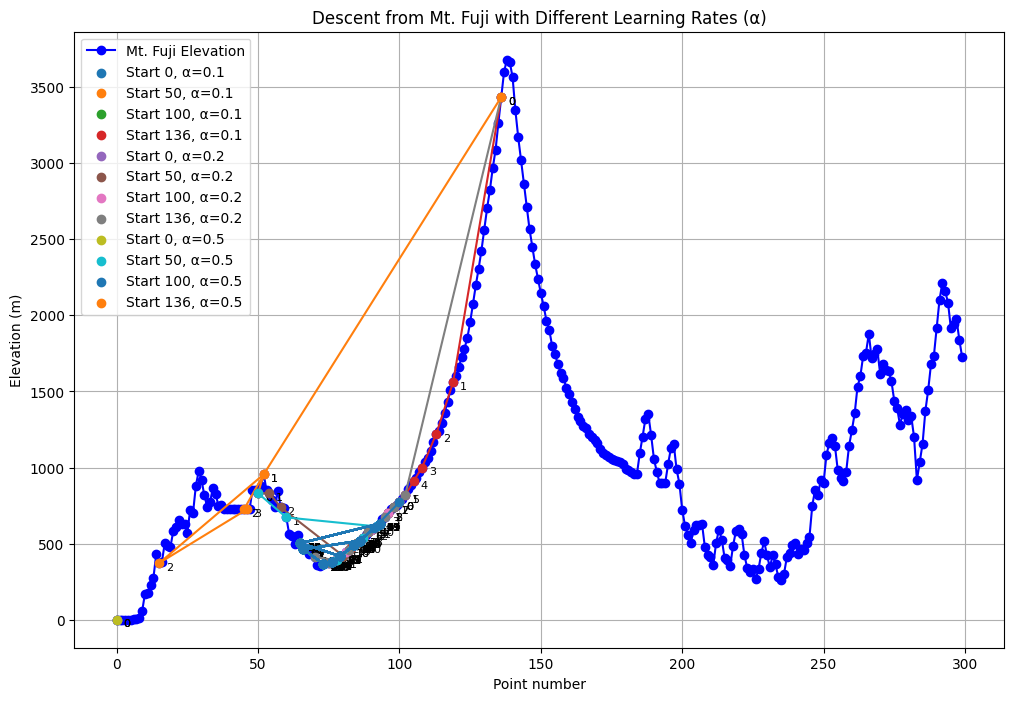

In [13]:
# Function to simulate going down the mountain with a limit on iterations
def go_down_mountain(elevation_data, start_point, alpha, max_iterations=100):
    current_point = start_point
    descent_path = [current_point]

    for _ in range(max_iterations):
        next_point = calculate_next_point(elevation_data, current_point, alpha)
        if next_point == current_point:
            break  # Stop if the next point is the same as the current point
        descent_path.append(next_point)
        current_point = next_point

    return descent_path

# Function to visualize the descent process for multiple starting points and alpha values
def visualize_descent_with_alpha(elevation_data, start_points, alphas):
    points = np.arange(len(elevation_data))
    elevation = elevation_data

    plt.figure(figsize=(12, 8))
    plt.plot(points, elevation, marker='o', linestyle='-', label='Mt. Fuji Elevation', color='blue')

    for alpha in alphas:
        for start_point in start_points:
            descent_path = go_down_mountain(elevation_data, start_point, alpha)
            print(f"Descent path from starting point {start_point} with alpha {alpha}: {descent_path}")

            # Convert path to coordinates
            path_points = [points[i] for i in descent_path]
            path_elevation = [elevation[i] for i in descent_path]

            # Plot the descent path
            plt.scatter(path_points, path_elevation, label=f'Start {start_point}, α={alpha}', zorder=5)
            plt.plot(path_points, path_elevation, linestyle='-', zorder=5)

            # Annotate each point on the descent path
            for i, (x, y) in enumerate(zip(path_points, path_elevation)):
                plt.annotate(f'{i}', xy=(x, y), xytext=(5, -5), textcoords='offset points', fontsize=8)

    # Adding titles and labels
    plt.title(f"Descent from Mt. Fuji with Different Learning Rates (α)")
    plt.xlabel("Point number")
    plt.ylabel("Elevation (m)")
    plt.legend()
    plt.grid(True)
    plt.show()



# Different alpha values to test
alpha_values = [0.1, 0.2, 0.5]

# Select a few specific starting points
selected_start_points = [0, 50, 100, 136]

# Visualize descent for selected starting points and alpha values
visualize_descent_with_alpha(elevation, selected_start_points, alpha_values)